<a href="https://colab.research.google.com/github/coldbilberry/repo-gui/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_3_%D0%A3%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B8_%D0%B8%D0%BC%D0%BF%D0%BE%D1%80%D1%82_%D0%BF%D0%B0%D0%BA%D0%B5%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

# metadata
print(regensburg_pediatric_appendicitis.metadata)

# variable information
print(regensburg_pediatric_appendicitis.variables)

{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [3]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [4]:
!pip install fancyimpute -q
!pip install catboost -q
!pip install eli5 -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder, label_binarize

!pip install catboost

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [5]:
from catboost import CatBoostClassifier, Pool


from sklearn.preprocessing import MinMaxScaler


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [6]:
# Объединение датасета
df = pd.concat([X, y], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [7]:
df = df.dropna(subset = ['Diagnosis'])

df.isna().sum()

,0
Age,0
BMI,26
Sex,1
Height,25
Weight,2
Length_of_Stay,3
Alvarado_Score,50
Paedriatic_Appendicitis_Score,50
Appendix_on_US,3
Appendix_Diameter,282


In [8]:
null = df.isna().sum()/len(df) * 100
null = pd.DataFrame({'feature':null.index, 'null_percentage':null}).sort_values(by='null_percentage', ascending=False).reset_index(drop=True)

null

,feature,null_percentage
0,Abscess_Location,98.333333
1,Gynecological_Findings,96.666667
2,Conglomerate_of_Bowel_Loops,94.487179
3,Segmented_Neutrophils,93.076923
4,Ileus,92.307692
5,Perfusion,91.923077
6,Enteritis,91.538462
7,Appendicolith,91.153846
8,Coprostasis,90.897436
9,Perforation,89.615385


In [9]:
null = df.isna().sum()/len(df) * 100
null = pd.DataFrame({'feature':null.index, 'null_percentage':null}).sort_values(by='null_percentage', ascending=False).reset_index(drop=True)

null

,feature,null_percentage
0,Abscess_Location,98.333333
1,Gynecological_Findings,96.666667
2,Conglomerate_of_Bowel_Loops,94.487179
3,Segmented_Neutrophils,93.076923
4,Ileus,92.307692
5,Perfusion,91.923077
6,Enteritis,91.538462
7,Appendicolith,91.153846
8,Coprostasis,90.897436
9,Perforation,89.615385


In [10]:
null = df.isna().sum()/len(df) * 100
null = pd.DataFrame({'feature':null.index, 'null_percentage':null}).sort_values(by='null_percentage', ascending=False).reset_index(drop=True)

null

,feature,null_percentage
0,Abscess_Location,98.333333
1,Gynecological_Findings,96.666667
2,Conglomerate_of_Bowel_Loops,94.487179
3,Segmented_Neutrophils,93.076923
4,Ileus,92.307692
5,Perfusion,91.923077
6,Enteritis,91.538462
7,Appendicolith,91.153846
8,Coprostasis,90.897436
9,Perforation,89.615385


In [12]:
# список колонок для удаления
for_drop = []

In [13]:
for_drop.append('Abscess_Location')

In [14]:
for_drop.append('Gynecological_Findings')

In [15]:
for_drop.append('Conglomerate_of_Bowel_Loops')

In [16]:
for_drop.append('Segmented_Neutrophils')

In [17]:
for_drop.append('Ileus')

In [18]:
for_drop.append('Perfusion')

In [19]:
for_drop.append('Enteritis')

In [20]:
df_colith = df[df['Appendicolith'] == 'yes']

df_colith['Diagnosis']

,Diagnosis
39,appendicitis
74,appendicitis
347,appendicitis
488,appendicitis
492,appendicitis
513,appendicitis
521,appendicitis
533,appendicitis
534,appendicitis
538,appendicitis


In [21]:
df['Appendicolith'].fillna('no', inplace=True)

df['Appendicolith'].value_counts()

,count
Appendicolith,
no,744
yes,33
suspected,3


In [22]:
df_copro = df[df['Coprostasis'] == 'yes']

df_copro['Diagnosis']

,Diagnosis
22,no appendicitis
29,appendicitis
40,appendicitis
46,no appendicitis
66,no appendicitis
67,no appendicitis
101,no appendicitis
104,appendicitis
141,no appendicitis
183,appendicitis


In [23]:
for_drop.append('Coprostasis')

In [24]:
df_per = df[df['Perforation'] == 'yes']
df_per['Diagnosis']

,Diagnosis
500,appendicitis
522,appendicitis
529,appendicitis
536,appendicitis
543,appendicitis
547,appendicitis
550,appendicitis
553,appendicitis
560,appendicitis
561,appendicitis


In [25]:
df_per = df[df['Perforation'] == 'no']
df_per['Diagnosis']

,Diagnosis
0,appendicitis
15,no appendicitis
47,appendicitis
50,appendicitis
51,no appendicitis
67,no appendicitis
121,appendicitis
127,appendicitis
129,appendicitis
138,appendicitis


In [26]:
df.groupby('Perforation')['Diagnosis'].value_counts()

Perforation   Diagnosis      
no            appendicitis       30
              no appendicitis     4
not excluded  appendicitis       15
suspected     appendicitis        2
              no appendicitis     1
yes           appendicitis       29
Name: count, dtype: int64

In [27]:
df['Perforation'].fillna('suspected', inplace=True)

df['Perforation'].value_counts()

,count
Perforation,
suspected,702
no,34
yes,29
not excluded,15


In [28]:
df_app = df[df['Appendicular_Abscess'] == 'no']
df_app['Diagnosis']

,Diagnosis
0,appendicitis
15,no appendicitis
37,no appendicitis
41,appendicitis
78,appendicitis
...,...
757,appendicitis
766,appendicitis
768,appendicitis
772,appendicitis


In [29]:
df.groupby('Appendicular_Abscess')['Diagnosis'].value_counts()

Appendicular_Abscess  Diagnosis      
no                    appendicitis       56
                      no appendicitis     9
suspected             appendicitis        1
yes                   appendicitis       19
Name: count, dtype: int64

In [30]:
df['Appendicular_Abscess'].fillna('not excluded', inplace=True)
df['Appendicular_Abscess'].value_counts()

,count
Appendicular_Abscess,
not excluded,695
no,65
yes,19
suspected,1


In [31]:
for_drop.append('Bowel_Wall_Thickening')

In [32]:
df.groupby('Lymph_Nodes_Location')['Diagnosis'].value_counts()

Lymph_Nodes_Location            Diagnosis      
Ileozökal                       appendicitis        1
Lymphadenopathie                appendicitis        1
MB                              no appendicitis     2
Mesenterial, links inguinal     appendicitis        1
Ovarialzysten                   appendicitis        1
UB                              no appendicitis     1
ileocoecal                      appendicitis        2
                                no appendicitis     1
ileocoekal                      appendicitis        1
ileocöcal                       appendicitis        2
inguinal                        appendicitis        1
lokal um die Appendix           appendicitis        1
mesenterial                     no appendicitis    29
                                appendicitis        8
mesenterial, re UB              appendicitis        1
multiple Lokalisationen         appendicitis        1
periappendikulär                appendicitis        1
periumbilikal                   no appendicitis     1
re MB                           no appendicitis     2
                                appendicitis        1
re UB                           no appendicitis    15
                                appendicitis        7
re UB                           no appendicitis     1
                                appendicitis        1
re UB                           appendicitis        1
re UB, ileocoecal               appendicitis        1
re UB, periumbilikal            appendicitis        1
re UB, re MB                    no appendicitis     1
reUB                            no appendicitis     8
                                appendicitis        4
rechter Unter- und Mittelbauch  appendicitis        1
                                no appendicitis     1
rechter Unterbauch              appendicitis       20
Name: count, dtype: int64

In [33]:
df.loc[(df['Lymph_Nodes_Location'].isna()) & (df['Diagnosis'] == 'appendicitis'), 'Lymph_Nodes_Location'] = 'rechter Unterbauch'
df.loc[(df['Lymph_Nodes_Location'].isna()) & (df['Diagnosis'] == 'no appendicitis'), 'Lymph_Nodes_Location'] = 'mesenterial'
df['Lymph_Nodes_Location'].value_counts()

,count
Lymph_Nodes_Location,
rechter Unterbauch,424
mesenterial,292
re UB,22
reUB,12
re MB,3
ileocoecal,3
re UB,2
rechter Unter- und Mittelbauch,2
ileocöcal,2


In [34]:
df.groupby('Target_Sign')['Diagnosis'].value_counts()

Target_Sign  Diagnosis      
no           no appendicitis    26
             appendicitis       25
yes          appendicitis       82
             no appendicitis     5
Name: count, dtype: int64

In [35]:
df.loc[(df['Target_Sign'].isna()) & (df['Diagnosis'] == 'appendicitis'), 'Target_Sign'] = 'yes'
df.loc[(df['Target_Sign'].isna()) & (df['Diagnosis'] == 'no appendicitis'), 'Target_Sign'] = 'not excluded'
df['Target_Sign'].value_counts()

,count
Target_Sign,
yes,443
not excluded,286
no,51


In [36]:
df.groupby('Meteorism')['Diagnosis'].value_counts()

Meteorism  Diagnosis      
no         appendicitis       11
yes        no appendicitis    70
           appendicitis       59
Name: count, dtype: int64

In [37]:
for_drop.append('Meteorism')

In [38]:
df.groupby('Pathological_Lymph_Nodes')['Diagnosis'].value_counts()

Pathological_Lymph_Nodes  Diagnosis      
no                        appendicitis       29
                          no appendicitis    20
yes                       appendicitis       82
                          no appendicitis    72
Name: count, dtype: int64

In [39]:
for_drop.append('Pathological_Lymph_Nodes')

In [40]:
df.groupby('Appendix_Wall_Layers')['Diagnosis'].value_counts()

Appendix_Wall_Layers  Diagnosis      
intact                appendicitis       102
                      no appendicitis     30
partially raised      appendicitis         9
raised                appendicitis        73
                      no appendicitis      3
upset                 appendicitis         1
Name: count, dtype: int64

In [41]:
df['Appendix_Wall_Layers'].fillna('intact', inplace=True)
df['Appendix_Wall_Layers'].value_counts()

,count
Appendix_Wall_Layers,
intact,694
raised,76
partially raised,9
upset,1


In [42]:
df.groupby('Surrounding_Tissue_Reaction')['Diagnosis'].value_counts()

Surrounding_Tissue_Reaction  Diagnosis      
no                           appendicitis        28
                             no appendicitis     16
yes                          appendicitis       196
                             no appendicitis     12
Name: count, dtype: int64

In [43]:
df['Surrounding_Tissue_Reaction'].fillna('yes', inplace=True)
df['Surrounding_Tissue_Reaction'].value_counts()

,count
Surrounding_Tissue_Reaction,
yes,736
no,44


In [44]:
df.groupby('Appendix_Diameter')['Diagnosis'].value_counts()

,,count
Appendix_Diameter,Diagnosis,
2.7,no appendicitis,1
2.9,no appendicitis,1
3.0,no appendicitis,2
3.2,no appendicitis,1
3.5,no appendicitis,5
...,...,...
13.0,appendicitis,8
13.2,appendicitis,1
14.0,appendicitis,5


In [45]:
median_value = df['Appendix_Diameter'].median()
df['Appendix_Diameter'].fillna(median_value, inplace=True)
df['Appendix_Diameter'].value_counts()

,count
Appendix_Diameter,
7.5,292
8.0,47
9.0,46
7.0,43
6.0,42
...,...
9.6,1
5.7,1
8.4,1


In [46]:
df.groupby('RBC_in_Urine')['Diagnosis'].value_counts()

RBC_in_Urine  Diagnosis      
+             appendicitis        50
              no appendicitis     38
++            appendicitis         9
              no appendicitis      7
+++           appendicitis        20
              no appendicitis     10
no            appendicitis       238
              no appendicitis    204
Name: count, dtype: int64

In [47]:
df['RBC_in_Urine'].fillna('no', inplace=True)
df['RBC_in_Urine'].value_counts()

,count
RBC_in_Urine,
no,646
+,88
+++,30
++,16


In [48]:
df.groupby('Ketones_in_Urine')['Diagnosis'].value_counts()

Ketones_in_Urine  Diagnosis      
+                 appendicitis        50
                  no appendicitis     27
++                appendicitis        29
                  no appendicitis     20
+++               appendicitis        86
                  no appendicitis     38
no                no appendicitis    179
                  appendicitis       153
Name: count, dtype: int64

In [49]:
df['Ketones_in_Urine'].fillna('no', inplace=True)
df['Ketones_in_Urine'].value_counts()

,count
Ketones_in_Urine,
no,530
+++,124
+,77
++,49


In [50]:
df.groupby('WBC_in_Urine')['Diagnosis'].value_counts()

WBC_in_Urine  Diagnosis      
+             appendicitis        30
              no appendicitis     21
++            appendicitis        11
              no appendicitis      8
+++           appendicitis         8
              no appendicitis      4
no            appendicitis       270
              no appendicitis    231
Name: count, dtype: int64

In [51]:
df['WBC_in_Urine'].fillna('no', inplace=True)
df['WBC_in_Urine'].value_counts()

,count
WBC_in_Urine,
no,698
+,51
++,19
+++,12


In [52]:
df.groupby('Ipsilateral_Rebound_Tenderness')['Diagnosis'].value_counts()

Ipsilateral_Rebound_Tenderness  Diagnosis      
no                              no appendicitis    304
                                appendicitis       277
yes                             appendicitis        28
                                no appendicitis     10
Name: count, dtype: int64

In [53]:
df['Ipsilateral_Rebound_Tenderness'].fillna('not excluded', inplace=True)
df['Ipsilateral_Rebound_Tenderness'].value_counts()

,count
Ipsilateral_Rebound_Tenderness,
no,581
not excluded,161
yes,38


In [54]:
df.groupby('Neutrophil_Percentage')['Diagnosis'].value_counts()

,,count
Neutrophil_Percentage,Diagnosis,
27.2,no appendicitis,1
29.5,appendicitis,1
29.7,appendicitis,1
32.2,no appendicitis,1
35.1,no appendicitis,1
...,...,...
93.8,no appendicitis,1
93.9,appendicitis,1
94.1,appendicitis,1


In [55]:
median_value = df['Neutrophil_Percentage'].median()
df['Neutrophil_Percentage'].fillna(median_value, inplace=True)
df['Neutrophil_Percentage'].value_counts()

,count
Neutrophil_Percentage,
75.5,106
79.0,8
84.5,7
68.4,7
80.0,7
...,...
41.1,1
55.7,1
70.6,1


In [56]:
df = df.drop(for_drop, axis=1)

df.isna().sum()

,0
Age,0
BMI,26
Sex,1
Height,25
Weight,2
Length_of_Stay,3
Alvarado_Score,50
Paedriatic_Appendicitis_Score,50
Appendix_on_US,3
Appendix_Diameter,0


In [57]:
missing_columns = df.columns[df.isnull().any()].tolist()
missing_columns

['BMI',
 'Sex',
 'Height',
 'Weight',
 'Length_of_Stay',
 'Alvarado_Score',
 'Paedriatic_Appendicitis_Score',
 'Appendix_on_US',
 'Migratory_Pain',
 'Lower_Right_Abd_Pain',
 'Contralateral_Rebound_Tenderness',
 'Coughing_Pain',
 'Nausea',
 'Loss_of_Appetite',
 'Body_Temperature',
 'WBC_Count',
 'Neutrophilia',
 'RBC_Count',
 'Hemoglobin',
 'RDW',
 'Thrombocyte_Count',
 'CRP',
 'Dysuria',
 'Stool',
 'Peritonitis',
 'Psoas_Sign',
 'US_Performed',
 'Free_Fluids']

In [58]:
column_types = df.dtypes

print("Типы данных колонок:\n", column_types)

Типы данных колонок:
 Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil_Percentage               float64
Neutrophilia                         object
RBC_Count                           float64
Hemoglobin                          float64
RDW       

In [59]:
# разделим количественные и качественные колонки
cat_columns = ['Sex',
 'Appendix_on_US',
 'Migratory_Pain',
 'Lower_Right_Abd_Pain',
 'Contralateral_Rebound_Tenderness',
 'Coughing_Pain',
 'Nausea',
 'Loss_of_Appetite',
 'Neutrophilia',
 'Dysuria',
 'Stool',
 'Peritonitis',
 'Psoas_Sign',
 'US_Performed',
 'Free_Fluids']

num_columns = ['Age',
  'BMI',
 'Height',
 'Weight',
 'Length_of_Stay',
 'Alvarado_Score',
 'Paedriatic_Appendicitis_Score',
 'Appendix_Diameter',
 'Body_Temperature',
 'WBC_Count',
  'Neutrophil_Percentage',
 'RBC_Count',
 'Hemoglobin',
 'RDW',
 'Thrombocyte_Count',
 'CRP']

In [60]:
# замена на моду
for column in cat_columns:
    mode = df[column].mode()[0]  # Найти моду
    df[column].fillna(mode, inplace=True)

# замена на медиану
for column in num_columns:
    median = df[column].median()  # Найти медиану
    df[column].fillna(median, inplace=True)

df.isna().sum()

,0
Age,0
BMI,0
Sex,0
Height,0
Weight,0
Length_of_Stay,0
Alvarado_Score,0
Paedriatic_Appendicitis_Score,0
Appendix_on_US,0
Appendix_Diameter,0


In [61]:
for i in df.columns:
  if len(df[i].value_counts() == 1):
    print(i, len(df[i].value_counts()))

Age 577
BMI 511
Sex 2
Height 187
Weight 269
Length_of_Stay 19
Alvarado_Score 11
Paedriatic_Appendicitis_Score 11
Appendix_on_US 2
Appendix_Diameter 78
Migratory_Pain 2
Lower_Right_Abd_Pain 2
Contralateral_Rebound_Tenderness 2
Coughing_Pain 2
Nausea 2
Loss_of_Appetite 2
Body_Temperature 46
WBC_Count 210
Neutrophil_Percentage 355
Neutrophilia 2
RBC_Count 171
Hemoglobin 65
RDW 53
Thrombocyte_Count 260
Ketones_in_Urine 4
RBC_in_Urine 4
WBC_in_Urine 4
CRP 146
Dysuria 2
Stool 4
Peritonitis 3
Psoas_Sign 2
Ipsilateral_Rebound_Tenderness 3
US_Performed 2
Free_Fluids 2
Appendix_Wall_Layers 4
Target_Sign 3
Appendicolith 3
Perforation 4
Surrounding_Tissue_Reaction 2
Appendicular_Abscess 4
Lymph_Nodes_Location 26
Management 4
Severity 2
Diagnosis 2


In [62]:
df.Diagnosis.value_counts()

,count
Diagnosis,
appendicitis,463
no appendicitis,317


In [63]:
X = df.drop('Diagnosis', axis=1)
y = df.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
print("Список колонок датасета:")
print(df.columns.tolist())

Список колонок датасета:
['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'Neutrophilia', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess', 'Lymph_Nodes_Location', 'Management', 'Severity', 'Diagnosis']


In [65]:
# Определение числовых и категориальных колонок
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [66]:
print("Числовые колонки:", numerical_features)
print("Категориальные колонки:", categorical_features)

Числовые колонки: ['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_Diameter', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP']
Категориальные колонки: ['Sex', 'Appendix_on_US', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess', 'Lymph_Nodes_Location', 'Management', 'Severity', 'Diagnosis']


In [67]:
# Преобразование категориальных колонок в числовые с использованием LabelEncoder
label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))


X = df.drop('Diagnosis', axis=1)
y = df.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features.remove('Diagnosis')

# Создание пулов данных для CatBoost, указывая категориальные признаки
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=10)
catboost_model.fit(train_pool)

0:	learn: 0.5097432	total: 57.3ms	remaining: 5.68s
10:	learn: 0.0773028	total: 124ms	remaining: 1s
20:	learn: 0.0259242	total: 187ms	remaining: 704ms
30:	learn: 0.0148058	total: 252ms	remaining: 560ms
40:	learn: 0.0090676	total: 317ms	remaining: 457ms
50:	learn: 0.0070916	total: 381ms	remaining: 366ms
60:	learn: 0.0055360	total: 438ms	remaining: 280ms
70:	learn: 0.0048121	total: 498ms	remaining: 204ms
80:	learn: 0.0039981	total: 563ms	remaining: 132ms
90:	learn: 0.0035828	total: 627ms	remaining: 62ms
99:	learn: 0.0032804	total: 683ms	remaining: 0us


In [68]:
# Предсказание и оценка модели
y_pred = catboost_model.predict(test_pool)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [69]:
r2_score(y_test, y_pred )

1.0

In [70]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        65

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [71]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[91  0]
 [ 0 65]]


In [72]:
# Проведение кросс-валидации для более надежной оценки модели
cv_scores = cross_val_score(catboost_model, X[num_columns], y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')

0:	learn: 0.6557630	total: 6.33ms	remaining: 627ms
10:	learn: 0.4208196	total: 32.6ms	remaining: 263ms
20:	learn: 0.3037239	total: 57.3ms	remaining: 215ms
30:	learn: 0.2546969	total: 82.9ms	remaining: 185ms
40:	learn: 0.2210954	total: 108ms	remaining: 155ms
50:	learn: 0.1961869	total: 135ms	remaining: 130ms
60:	learn: 0.1751682	total: 159ms	remaining: 102ms
70:	learn: 0.1599126	total: 184ms	remaining: 75ms
80:	learn: 0.1453982	total: 214ms	remaining: 50.2ms
90:	learn: 0.1353042	total: 237ms	remaining: 23.5ms
99:	learn: 0.1298736	total: 263ms	remaining: 0us
0:	learn: 0.6556378	total: 3.85ms	remaining: 381ms
10:	learn: 0.4192587	total: 31.6ms	remaining: 256ms
20:	learn: 0.3031658	total: 74.1ms	remaining: 279ms
30:	learn: 0.2461694	total: 102ms	remaining: 228ms
40:	learn: 0.2204852	total: 133ms	remaining: 191ms
50:	learn: 0.1967574	total: 157ms	remaining: 151ms
60:	learn: 0.1748679	total: 183ms	remaining: 117ms
70:	learn: 0.1599592	total: 212ms	remaining: 86.6ms
80:	learn: 0.1463601	total

In [73]:
# Получение важности признаков
feature_importances = catboost_model.get_feature_importance(train_pool)
feature_names = X_train.columns

In [74]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [75]:
# Вывод важности признаков
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                             Feature    Importance
36                       Target_Sign  4.970298e+01
41              Lymph_Nodes_Location  2.100076e+01
9                  Appendix_Diameter  5.371100e+00
42                        Management  5.077759e+00
17                         WBC_Count  1.980564e+00
20                         RBC_Count  1.706770e+00
6                     Alvarado_Score  1.669904e+00
4                             Weight  1.268277e+00
0                                Age  1.224927e+00
27                               CRP  1.198607e+00
23                 Thrombocyte_Count  9.918539e-01
21                        Hemoglobin  8.642708e-01
22                               RDW  8.169436e-01
7      Paedriatic_Appendicitis_Score  7.784944e-01
16                  Body_Temperature  7.182067e-01
28                           Dysuria  6.980610e-01
8                     Appendix_on_US  6.538841e-01
18             Neutrophil_Percentage  6.100061e-01
1         

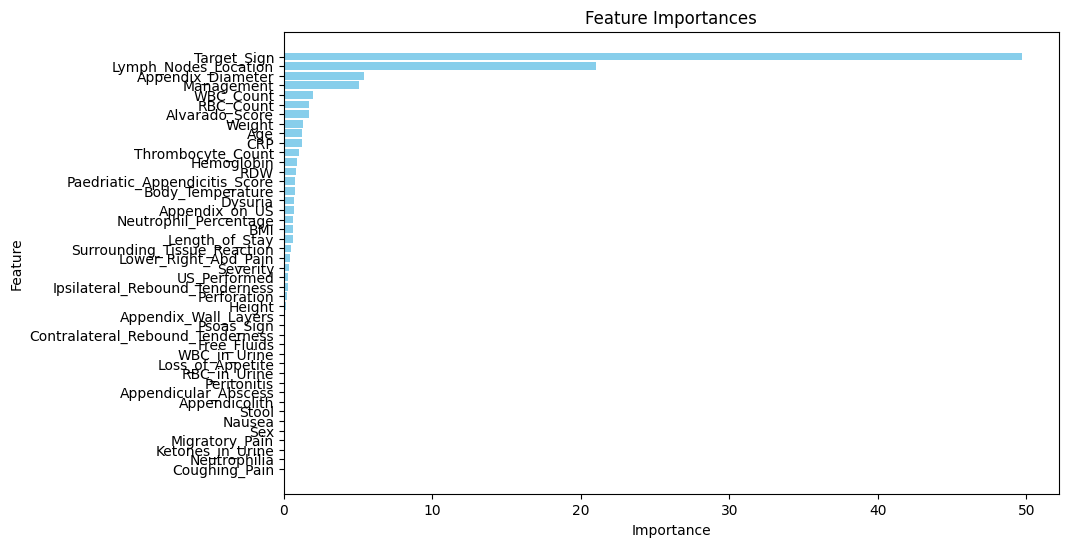

In [76]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [77]:
lg_model = LogisticRegression(random_state=42, max_iter=10000)

lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [78]:
y_pred = lg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        91
           1       1.00      0.94      0.97        65

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.97      0.97       156



In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных в тензоры
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Создание PyTorch датасетов
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

# Создание PyTorch загрузчиков данных
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [80]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
model = SimpleNN(input_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 20
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Сохраняем среднее значение потерь за эпоху
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss}')

print('Training finished')

Epoch 1, Loss: 8.477377957105636
Epoch 2, Loss: 0.6934010505676269
Epoch 3, Loss: 0.6785913169384002
Epoch 4, Loss: 0.6747927963733673
Epoch 5, Loss: 0.6740678608417511
Epoch 6, Loss: 0.6756828188896179
Epoch 7, Loss: 0.6741272151470185
Epoch 8, Loss: 0.672674834728241
Epoch 9, Loss: 0.6614083051681519
Epoch 10, Loss: 0.6542802155017853
Epoch 11, Loss: 0.6621644198894501
Epoch 12, Loss: 0.6503183603286743
Epoch 13, Loss: 0.6606613099575043
Epoch 14, Loss: 0.6436676740646362
Epoch 15, Loss: 0.6310089707374573
Epoch 16, Loss: 0.6309362590312958
Epoch 17, Loss: 0.6324225485324859
Epoch 18, Loss: 0.6842375159263611
Epoch 19, Loss: 0.6843758642673492
Epoch 20, Loss: 0.6793169498443603
Training finished


In [81]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test data: {100 * correct / total}%')

Accuracy on the test data: 58.333333333333336%


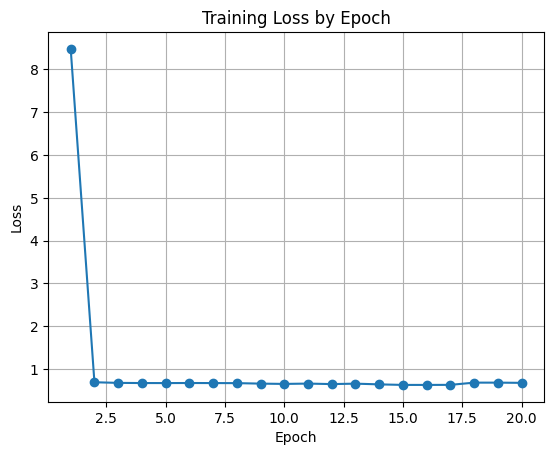

In [82]:
# Построение графика ошибки по эпохам
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title('Training Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [83]:
import torch.nn.functional as F


class TabularNN(nn.Module):
    def __init__(self, input_size, hidden_sizes=[128, 64], output_size=2):
        super(TabularNN, self).__init__()
        self.hidden_layers = nn.ModuleList()

        # Входной слой
        self.hidden_layers.append(nn.Linear(input_size, hidden_sizes[0]))

        # Скрытые слои
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))

        # Выходной слой
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        # Применяем ReLU ко всем скрытым слоям
        for layer in self.hidden_layers:
            x = F.relu(layer(x))

        # Выходной слой
        x = self.output_layer(x)
        return x

In [84]:
# Преобразование данных в тензоры
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Создание PyTorch датасетов
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

# Создание PyTorch загрузчиков данных
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

input_size = X_train.shape[1]
model = TabularNN(input_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [85]:
epochs = 20
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Сохраняем среднее значение потерь за эпоху
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss}')

print('Training finished')

Epoch 1, Loss: 3.3232758045196533
Epoch 2, Loss: 0.7941760301589966
Epoch 3, Loss: 0.7058180749416352
Epoch 4, Loss: 0.6842737793922424
Epoch 5, Loss: 0.6772954106330872
Epoch 6, Loss: 0.675207394361496
Epoch 7, Loss: 0.6757632195949554
Epoch 8, Loss: 0.6751788020133972
Epoch 9, Loss: 0.6741488218307495
Epoch 10, Loss: 0.6745206415653229
Epoch 11, Loss: 0.6755825281143188
Epoch 12, Loss: 0.674174964427948
Epoch 13, Loss: 0.6737647294998169
Epoch 14, Loss: 0.6748320937156678
Epoch 15, Loss: 0.6745496332645416
Epoch 16, Loss: 0.6751237511634827
Epoch 17, Loss: 0.6739880323410035
Epoch 18, Loss: 0.6753304541110993
Epoch 19, Loss: 0.6749451339244843
Epoch 20, Loss: 0.6747261583805084
Training finished


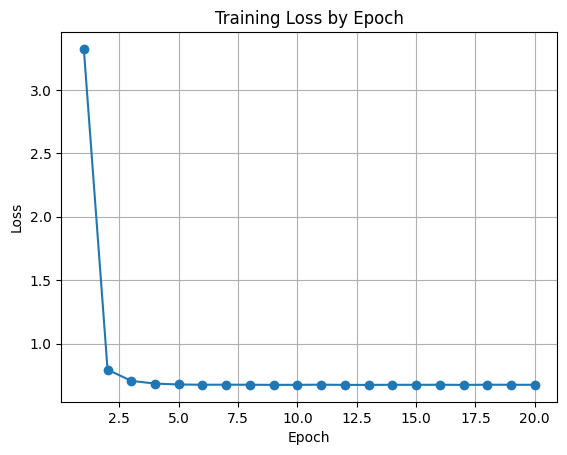

In [86]:
# Построение графика ошибки по эпохам
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title('Training Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()